In [2]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio

In [78]:
backtester = Backtester(datetime(2020, 2, 1, 0, 0, 0))

In [85]:
LONG_FACTOR_CANDIDATES = [
    "VLUE", # Value.
#     "USMV", # Low volatility.
#     "SDY", # Dividend.
    "VXX",
]
SHORT_FACTOR_CANDIDATES = [
    "SPY", # Large cap.
    "IWF", # Growth.
    "IWM", # Small cap.
    "MTUM", # Momentum.
]
LONG_CANDIDATES = [ 
    "IBUY", # Ecommerce is growing.
    "ESPO", # Online gaming.
    "LIT", # For lithium ion batteries.
    "MCHI",
    "CQQQ",
    
    # Call centers.
    "FIVN",
    "TWLO",
    
    "AMZN",
    "BLK",
    "BABA",
    "DDOG",
    "FDX",
    "NVDA",
    "PBW",
    "PINS",
    "PTON",
    "SNAP",
    "SE",
    "SQ",
    "TTD",
    "TSLA",
    "UPS",
    "ZG",
    "SHOP",
    "UBER",
    "ARKK",
# #     "SNOW" # Not enough data yet.
# #     "U" # Not enough data yet.
] + LONG_FACTOR_CANDIDATES
SHORT_CANDIDATES = [
    "VRSN",
    "CSCO",
    "IBM",
    "BOX",
    "CLDR",
    "EQR",
    "NEWR",
    "VMW",
    "GDDY",
#     "RXT" # Rackspace. Not enough data yet.
    # Uber will outperform lyft because it's in the deliveries instead of transportations business.
    "LYFT", 
    # Wait a few days until things bounce then add it again.
#     "PS", # Who takes pluralsight training??
    "GRPN",
    
    "WIFI", # Future is not wifi hotspots. It's cellular.
    "T", # AT&T is becoming a utility.
    "VZ", # Verizon is becoming a utility.
    "DISH", # Satellite TV is dying.
    "SIRI", # Spotify/Apple Music taking over.
    
    "GUNR", # Natural resources.
#     "MJ", # Weed stuff. Dems love this.
    
#     "APPS", # Pre-installed android crapware. But I don't know the business model.
] + SHORT_FACTOR_CANDIDATES


r = backtester.backtest(LONG_CANDIDATES, SHORT_CANDIDATES, min_variance_portfolio)

In [86]:
print("LONG FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(LONG_CANDIDATES))
print()
print("SHORT FINVIZ - ", "https://elite.finviz.com/screener.ashx?v=111&t=" + ",".join(SHORT_CANDIDATES))

LONG FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=IBUY,ESPO,LIT,MCHI,CQQQ,FIVN,TWLO,AMZN,BLK,BABA,DDOG,FDX,NVDA,PBW,PINS,PTON,SNAP,SE,SQ,TTD,TSLA,UPS,ZG,SHOP,UBER,ARKK,VLUE,VXX

SHORT FINVIZ -  https://elite.finviz.com/screener.ashx?v=111&t=VRSN,CSCO,IBM,BOX,CLDR,EQR,NEWR,VMW,GDDY,LYFT,PS,GRPN,WIFI,T,VZ,YELP,DISH,SIRI,GUNR,SPY,IWF,IWM,MTUM


In [87]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

cum_returns = (r.returns_history+1).cumprod()
fig.add_trace(go.Scatter(x=cum_returns.index, y=cum_returns), row=1, col=1)
fig.update_yaxes(type="log", row=1, col=1)


long_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in LONG_CANDIDATES]]
for (k, v) in long_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=2, col=1)
    
short_allocations = r.allocation_history[[c for c in r.allocation_history.columns if c in SHORT_CANDIDATES]]
for (k, v) in short_allocations.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=3, col=1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1200,)
fig.show()

# Proposed Allocation

## Sorted A-Z

In [88]:
import plotly.express as px
data = r.allocation_history.iloc[-1]
px.bar(x=data.index, y=data)

## Sorted by weight

In [89]:
print(data[data!=0].sort_values())

MTUM   -0.137865
IWF    -0.125541
SPY    -0.093216
VRSN   -0.076811
IWM    -0.076486
GUNR   -0.071471
VZ     -0.054171
GDDY   -0.046903
T      -0.044507
PS     -0.042984
SIRI   -0.041684
VMW    -0.036527
CLDR   -0.035492
BOX    -0.033949
YELP   -0.031187
CSCO   -0.028812
WIFI   -0.018050
EQR    -0.015959
DISH   -0.006903
LYFT   -0.004650
GRPN   -0.004264
NEWR   -0.003005
SE      0.002416
PINS    0.005685
SHOP    0.006355
ZG      0.007837
TWLO    0.010213
VXX     0.011228
CQQQ    0.012913
MCHI    0.013340
DDOG    0.021177
PBW     0.025644
ARKK    0.030862
SNAP    0.032507
IBUY    0.042111
LIT     0.045705
FIVN    0.046984
NVDA    0.047958
FDX     0.060750
UBER    0.062050
ESPO    0.066171
UPS     0.067532
AMZN    0.074110
BLK     0.116485
VLUE    0.189966
Name: 2020-11-05 00:00:00, dtype: float64


Start date,2020-02-03
End date,2020-11-05
Total months,9
,Backtest
Annual return,130.909%
Cumulative returns,90.455%
Annual volatility,10.482%
Sharpe ratio,8.05
Calmar ratio,42.24
Stability,0.98
Max drawdown,-3.099%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.10,2020-03-30,2020-04-09,2020-04-16,14
1,1.91,2020-03-18,2020-03-19,2020-03-23,4
2,1.41,2020-04-22,2020-05-01,2020-05-06,11
3,1.40,2020-10-07,2020-10-12,2020-10-14,6
4,1.09,2020-03-03,2020-03-04,2020-03-05,3


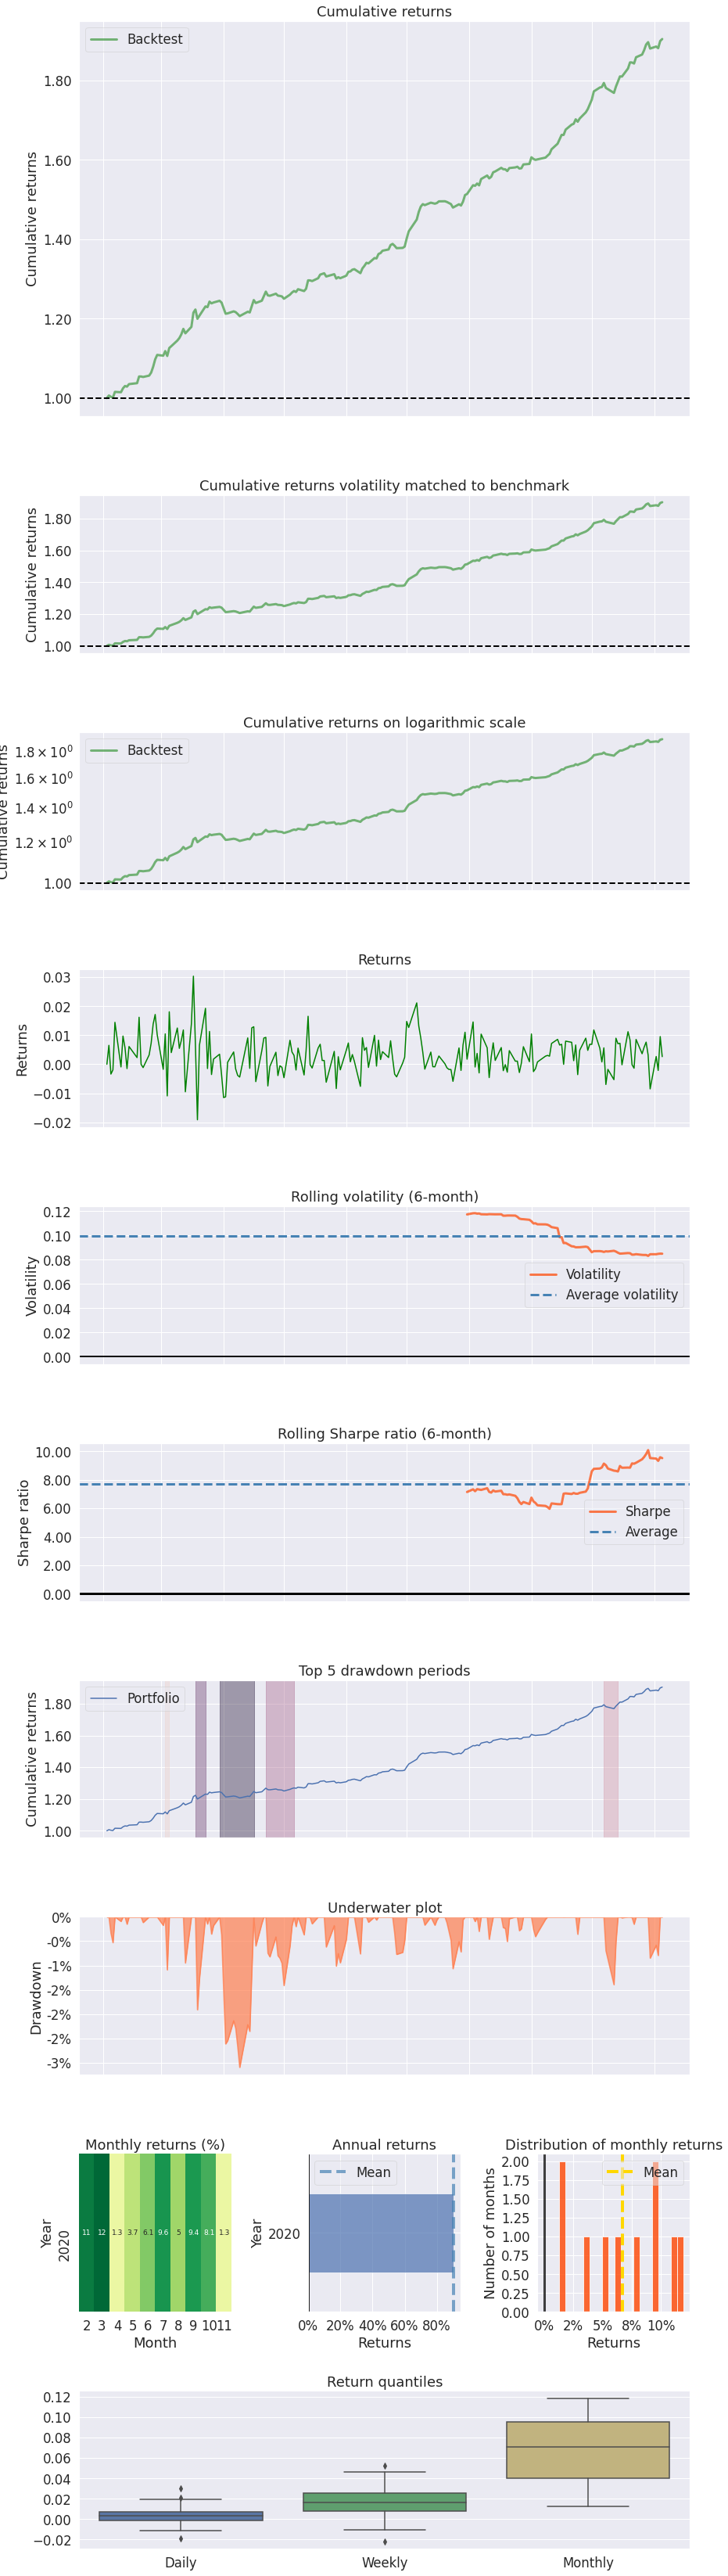

In [90]:
import pyfolio as pf
pf.create_returns_tear_sheet(r.returns_history)


In [91]:
if True:
    r.save_most_recent_allocation("./allocations/", leverage=1.8)